# Exercise 1

## a)

In [1]:
library(aaltobda)
data("windshieldy1")
head(windshieldy1)
windshieldy_test <- c(13.357, 14.928, 14.896, 14.820)

[1] 13.357 14.928 14.896 15.297 14.820 12.067

Here we are insterested in performing inference over $\mu$ and $\sigma$ given a Gaussian observation model $p(y \mid\mu,\sigma^2)$ and a non-informative and improper prior $p(\mu,\sigma) \propto \sigma^{-1}$. As stated in the BDA book, this prior can be obtained by making the normal inverse chi squared prior non informative, see p 67. In particular we make $\kappa_0 \rightarrow 0$, $\nu_0 \rightarrow -1$ and $\sigma_0^2 \rightarrow 0$ (see page 73 for an analogy in the multivariate case). With this we have

Likelihood $p(y \mid\mu,\sigma^2)$:

$$
p(y\mid\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2}(y - \mu)^2\right)
$$

Prior (normal inverse $\chi^2$): 

$$
p(\mu,\sigma^2 \mid \mu_0, \sigma^2_0 / \kappa_0, \nu_0, \sigma^2_0) = \text{Inv-}\chi^2(\nu_0,\sigma_0^2)\mathcal{N}\left(\mu \mid \mu_0, \frac{\sigma^2}{\kappa_0}\right) = \\
%
% Inverse xi squared part
\frac{ \left(\frac{\sigma_0^2\nu_0}{2}\right)^{\frac{\nu_0}{2}} }{\Gamma\left(\frac{\nu_0}{2}\right)}
%
%
\frac{\exp\left(-\frac{\nu_0\sigma_0^2}{(2\sigma^2)}\right)}{\sigma^{2\left(1+\frac{\nu_0}{2}\right)}}
%
%
% Normal part
 \frac{\sqrt{\kappa_0}}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{\kappa_0}{2\sigma^2}(\mu - \mu_0)^2\right) 
%
%
\propto \\
%
%
\sigma^{.-2-\nu_0} \exp\left(-\frac{\nu_0\sigma_0^2}{2\sigma^2}\right) 
%
\sigma^{-1}\exp\left(-\frac{\kappa_0}{2\sigma^2}(\mu - \mu_0)^2\right) = \\
%
%
%
\sigma^{-2-\nu_0} 
%
\sigma^{-1}\exp\left(-\frac{1}{2\sigma^2}\left(\nu_0\sigma_0^2+\kappa_0(\mu - \mu_0)^2\right)\right)
%
$$

which yields the result of page 67 equation 3.6.

By making use of the fact that this prior is conjugate of the Gaussian likelihood we know the posterior distribution is also inverse $\chi^2$. Thus:

Posterior (normal inverse $\chi^2$): 

$$
p(\mu,\sigma^2 \mid \mu_n, \sigma^2_n / \kappa_n, \nu_n, \sigma^2_n) \propto \\
%
%
%
\sigma^{.-2-\nu_n} 
%
\sigma^{-1}\exp\left(-\frac{1}{2\sigma^2}\left(\nu_n\sigma_n^2+\kappa_n(\mu - \mu_n)^2\right)\right)
$$

with ( see page 68 )

$$
\mu_n = \frac{\kappa_0}{\kappa_0+n}\mu_0 + \frac{n}{\kappa_0 + n }\hat{y}\\
%
%
\kappa_n = \kappa_0 + n \\
%
%
\nu_n = \nu_0 + n \\
%
%
\sigma^2_n = \frac{1}{\nu_n} \left( \nu_0\sigma^2_0 + (n-1)s^2  + \frac{\kappa_0 n }{\kappa_0+n}(\hat{y} - \mu_0)^2 \right)
$$

given the empirical mean and the (unbiased) empirical variance:

$$
\hat{y} = \frac{1}{n} \sum_n y_n \\
s^2     = \frac{1}{(n-1)} \sum_n (y_n - \hat{y})^2
$$

We can know take the limits $\kappa_0 \rightarrow 0$ and $\nu_0 \rightarrow -1$ and $\sigma_0^2 \rightarrow 0$. In this case $\mu_0 \rightarrow 0$ since the prior Gaussian converges to an improper uniform distribution defined in $(-\infty,\infty)$. This all yields:

prior:

$$
p(\mu,\sigma^2 \mid \mu_0, \sigma^2_0 / \kappa_0, \nu_0, \sigma^2_0) = \text{Inv-}\chi^2(\nu_0,\sigma_0^2)\mathcal{N}\left(\mu \mid \mu_0, \frac{\sigma^2}{\kappa_0}\right) 
\propto \\
%
%
\sigma^{.-2-\nu_0} 
%
\sigma^{-1}\exp\left(-\frac{1}{2\sigma^2}\left(0\sigma_0^2+0(\mu - \mu_0)^2\right)\right) = \\
%
%
\sigma^{-2 + 1} \sigma^{-1} = \sigma^{-2}
$$

The parameters of the posterior are given by:

$$
\mu_n = \hat{y}\\
%
%
\kappa_n = n \\
%
%
\nu_n = n - 1 \\
%
%
\sigma^2_n = s^2 
$$

And thus the posterior:


$$
p(\mu,\sigma^2 \mid \mu_n, \sigma^2_n / \kappa_n, \nu_n, \sigma^2_n) \propto \\
%
%
%
\sigma^{-2-n+1} 
%
\sigma^{-1}\exp\left(-\frac{1}{2\sigma^2}\left(\nu_n\sigma_n^2+\kappa_n(\mu - \mu_n)^2\right)\right)=\\
%
%
\sigma^{-2-n}\exp\left(-\frac{1}{2\sigma^2}\left((n-1)s^2+ n(\mu - \hat{y})^2\right)\right)
$$

matching the result in page 64.

The marginal posterior $p(\mu\mid y)$ comes from a mixture of scaled Gaussian yielding a t-student distribution, with mean $\hat{y}$ , scale $\sqrt{s^2/n}$ and $n-1$ degrees of freedom.
 

In [2]:
mu_point_est <- function( data ){
    
    post_mu = mean(data)
    
    post_mu
}

In [3]:
## Expected value of the posterior

# mu_point_est( data = windshieldy_test ) # matches the result from the report
mu_point_est( data = windshieldy1 )

[1] 14.61122

In [4]:
mu_interval <- function( data, prob ){
    
    n          = length(data)
    y_hat      = mean(data)
    s2         = 1 / ( n - 1 ) * sum( ( data - y_hat )**2 ) 
    
    post_mu    = y_hat
    post_scale = sqrt( s2 / n )
    post_df    = n - 1
    
    inter = (1-prob) / 2
    
    # normalized t distribution
    samples = rt( n = 10000, df = post_df )
    
    # un normalize
    samples =  samples * post_scale + post_mu
    
    quantile(samples, c(0+inter,1-inter))
}

In [5]:
## 95% posterior interval
# mu_interval( data = windshieldy_test, prob = 0.95 ) # matches result from report
mu_interval( data = windshieldy1    , prob = 0.95 )

2.5%    97.5% 
13.47775 15.74693

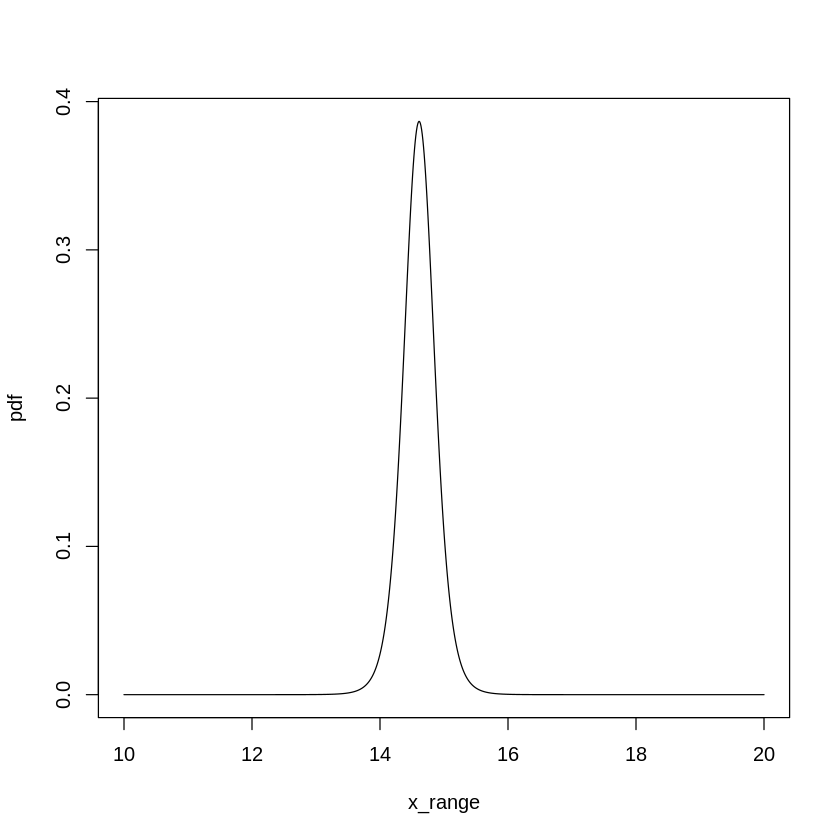

In [6]:
## density
# data = windshieldy_test
data = windshieldy1

# get parameters from posterior
n          = length(data)
y_hat      = mean(data)
s2         = 1 / ( n - 1 ) * sum( ( data - y_hat )**2 ) 
    
post_mu    = y_hat
post_scale = sqrt(s2 / n)
post_df    = n - 1
    
# plot density
x_range = seq( from = 10, to = 20, by = 0.01 )
pdf     = dt( 1 / post_scale * ( x_range - post_mu ) / post_scale, df = post_df) # Using probability under change of variables

plot(x_range, pdf, 'l')

## b)

In this case the exercise asks for the posterior predictive $p(\tilde{y} \mid y)$ which is obtained by integrating out the likelihood under the posterior. In particular:

$$
p(\tilde{y} \mid y) = \int p(\tilde{y} \mid \mu,\sigma^2) p(\mu,\sigma^2 | y) \text{d}\mu\text{d}\sigma^2 
$$

which is a student-t distribution with location $\hat{y}$, scale $\sqrt{1+\frac{1}{n}}s$ and $n-1$ degrees of freedom. I am not making the derivations since I will probably do extra exercises and 3.9 is included there.

In [7]:
mu_pred_point_est <- function( data ){
    
    post_mu = mean(data)
    
    post_mu
}


In [8]:
# mu_pred_point_est(data = windshieldy_test )
mu_pred_point_est( data = windshieldy1 )

[1] 14.61122

In [9]:
mu_pred_interval <- function( data, prob ){
    
    n          = length(data)
    y_hat      = mean(data)
    s2         = 1 / ( n - 1 ) * sum( ( data - y_hat )**2 ) 
    
    post_mu    = y_hat
    post_scale = sqrt( s2 + s2 / n )
    post_df    = n - 1
    
    inter = (1-prob) / 2
    
    # normalized t distribution
    samples = rt( n = 10000, df = post_df )
    
    # un normalize
    samples =  samples * post_scale + post_mu
    
    quantile(samples, c(0+inter,1-inter))
}

In [10]:
# mu_pred_interval( data = windshieldy_test, prob = 0.95 )
mu_pred_interval( data = windshieldy1    , prob = 0.95 )

2.5%    97.5% 
10.99505 18.18373

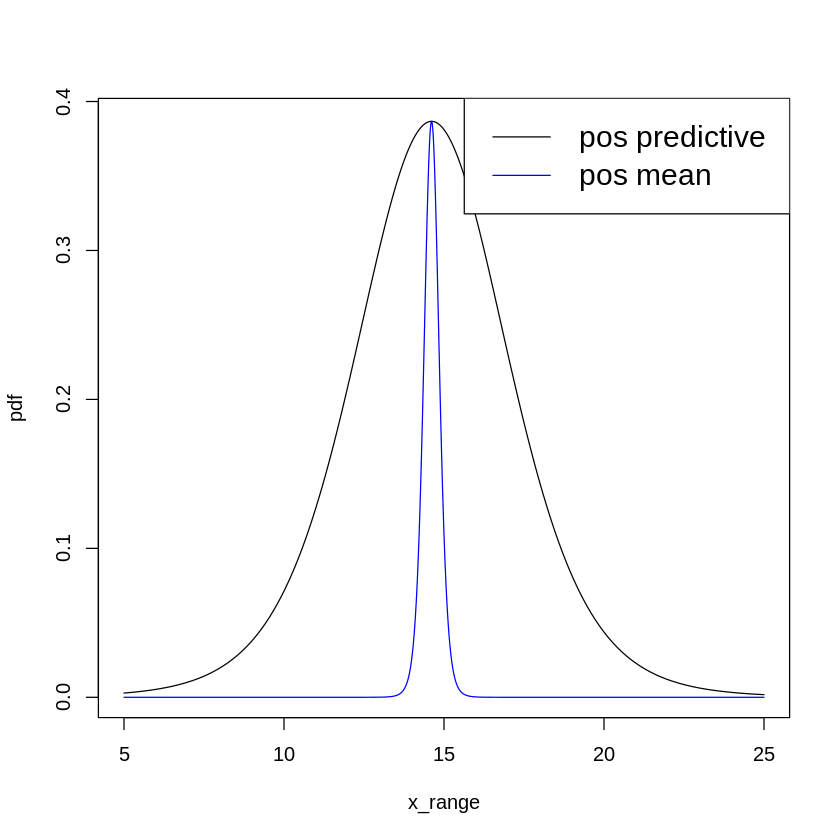

In [11]:
## density
# data = windshieldy_test
data = windshieldy1

# get parameters from posterior
n          = length(data)
y_hat      = mean(data)
s2         = 1 / ( n - 1 ) * sum( ( data - y_hat )**2 ) 
    
post_mu    = y_hat
post_scale = sqrt( s2 + s2 / n)
post_df    = n - 1
    
# plot density
x_range = seq( from = 5, to = 25, by = 0.01 )
pdf     = dt( 1 / post_scale * ( x_range - post_mu ) / post_scale, df = post_df) # Using probability under change of variables

plot(x_range, pdf, 'l') # is more heavy tailed than the posterior over just mu since we have considered
                        # the uncertainty in the mean.
    
post_scale = sqrt( s2 / n)
pdf_post   = dt( 1 / post_scale * ( x_range - post_mu ) / post_scale, df = post_df) # Using probability under change of variables

lines(x_range , pdf_post, type = 'l', col = 'blue')

legend( x = 'topright', legend = c("pos predictive", "pos mean"), col = c("black", "blue"), lty = 1, cex = 1.5 )

# Exercise 2

This exercise is the example of a joint Binomial distribution where the outputs are independent. In particular $k_0$ represents the number of patients that died under the control treatment with size $n_0$, while $k_1$ is the number of patients that died under the treatment with $n_1$ patients. 

The joint likelihood distribution is given by:

$$
y_0 , y_1 \sim p(y_0,y_1\mid p_0,p_1) \propto p_0^{k_0}(1-p_0)^{n_0 - k_0 }p_1^{k_1}(1-p_1)^{n_1 - k_1 }
$$

The conjugate prior of the Binomial distribution is the Beta distribution. Again we use independent Beta distribution over $p_0$ and $p_1$ with hyperparameters $\alpha_0,\beta_0$ and $\alpha_1,\beta_1$. 

$$
p(p_0,p_1\mid \alpha_0,\beta_0,\alpha_1,\beta_1) \propto p_0^{\alpha_0-1}(1-p_0)^{\beta_0-1}p_1^{\alpha_1-1}(1-p_1)^{\beta_1-1}
$$

The beta prior can be made improper by setting $\alpha = 0 , \beta=0$. However since this prior only affects the range $[0,1]$ I prefer making it uniform on this range. This is obtained by setting $\alpha = 1 , \beta=1$. In this case we see that $p(p_0,p_1\mid \alpha_0,\beta_0,\alpha_1,\beta_1) \propto 1$, as desired. 

The posterior distribution is obtained by mixing apples with apples and pears with pears. In particular:

$$
p( p_0,p_1 \mid y_0,y_1) \propto p_0^{k_0 + \alpha_0 - 1}(1-p_0)^{n_0 - k_0 + \beta_0 - 1 }p_1^{k_1 + \alpha_1 -1 }(1-p_1)^{n_1 - k_1 + \beta_1 - 1}
$$

which obviously inherits the independence from the prior and likelihood. 


The posterior distribution for the odds ratio can be obtained by sampling from the posterior and then performing the ration on each sample. I like to see this using LOTUS rule. This rule basically say that if we transform a sam,ple from a random variable with a function $g(\cdot)$ then there is no need to obtain the distribution induced by $g(\cdot)$ in order to take expectations or any other summary statistics. We can just take expectations over the base density applying the function. If we wish to sample then we just have to sample from the base density and apply the transformation. For our particular case this means, for example for the mean:

$$
z = g(p_0,p_1) = \frac{\frac{p_1}{1-p_1}}{\frac{p_0}{1-p_0}}
$$

then:

$$
\int z  p( g(p_0,p_1) ) \text{d} z = \int g(p_0,p_1)  p(p_0,p_1 | y ) \text{d}p_0\text{d}p_1 \approx \frac{1}{S}\sum_s g(p_0^{(s)}p_1^{(s)}) ;  p_0^{(s)}p_1^{(s)} \sim p(p_0,p_1 | y )
$$




In [12]:
# Prior parameters
prior_alfa_0 = 1
prior_beta_0 = 1

prior_alfa_1 = 1
prior_beta_1 = 1

# Likelihood parametesr
n_0 = 674
k_0 = 39

n_1 = 680
k_1 = 22

# Posterior parameters
pos_alfa_0 = k_0 + prior_alfa_0
pos_beta_0 = n_0 - k_0 + prior_beta_0

pos_alfa_1 = k_1 + prior_alfa_1
pos_beta_1 = n_1 - k_1 + prior_beta_1

In [13]:
# Draw samples from the posterior
p0 <- rbeta( 1000000, pos_alfa_0, pos_beta_0 ) 
p1 <- rbeta( 1000000, pos_alfa_1, pos_beta_1 ) 

In [14]:
## odds ratio computation
odds_ratio <- function(x,y){
    
    ( x / ( 1 - x ) ) / ( y / ( 1 - y ) )
}

## expected value of the posterior odds ratio
posterior_odds_ratio_point_est <- function( p0, p1 ){
    
    sample_odds_ratio <- odds_ratio( p1, p0 )

    mean(sample_odds_ratio)
}

## posterior intervals of odds ratio
posterior_odds_ratio_interval <- function( p0, p1, prob ){
    
    sample_odds_ratio <- odds_ratio( p1, p0 )
    
    inter = (1 - prob) / 2
    
    quantile( sample_odds_ratio, c(0+inter,1-inter) )
}

In [15]:
posterior_odds_ratio_point_est( p0 = p0, p1 = p1 )

[1] 0.5699926

In [16]:
posterior_odds_ratio_interval( p0 = p0, p1 = p1, prob = 0.9 )

5%       95% 
0.3508039 0.8521836

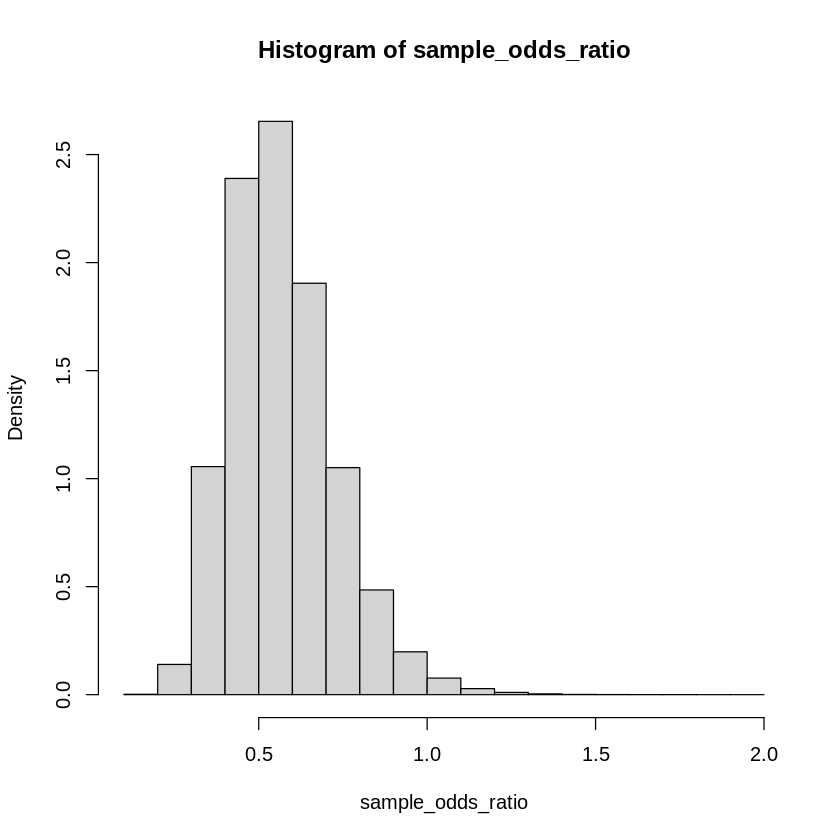

In [17]:
## Histogram
sample_odds_ratio <- odds_ratio( p1, p0 )

hist( sample_odds_ratio, freq = FALSE )

The posterior odds ratio is given by $0.57$, we can be certain about this value since the posterior is tight around it, as given by its posterior $95$% credible interval $[0.35, 0.85]$. We can be mostly totally certain that the $p_0$ odd ratio is greater than $p_1$ odds ratio since values are below $1$ in the $95$% posterior interval. We can gain insight by looking at the posterior (see next section) where we see that the posterior of $p_0$ has greater values.

## b)

I'll draw prior and posterior pdfs to discuss the choice of the prior.

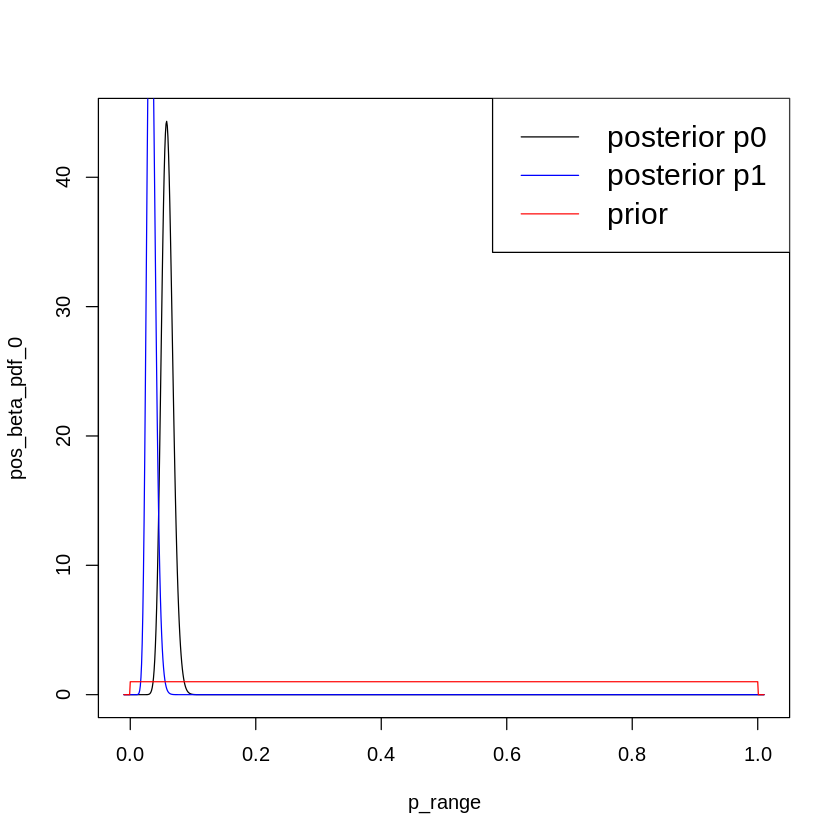

In [18]:
p_range    = seq( from = -0.01, to = 1.01, by = 0.001 ) # since beta is defined on 0-1

prior_beta_pdf_0 = dbeta( p_range , prior_alfa_0, prior_beta_0 )  
pos_beta_pdf_0   = dbeta( p_range , pos_alfa_0  , pos_beta_0 )  
pos_beta_pdf_1   = dbeta( p_range , pos_alfa_1  , pos_beta_1 )  


plot( p_range, pos_beta_pdf_0, type = 'l')
lines( p_range , pos_beta_pdf_1, type = 'l', col = 'blue')
lines( p_range , prior_beta_pdf_0, type = 'l', col = 'red')

# Add a legend
legend( x = 'topright', legend = c("posterior p0", "posterior p1", "prior"), col = c("black", "blue", "red"), lty = 1, cex = 1.5 )


In [19]:
## Check a totally misspecified prior (place probability around 1.0)

# Prior parameters
prior_alfa_0 = 10
prior_beta_0 = 1

prior_alfa_1 = 10
prior_beta_1 = 1

# Likelihood parametesr
n_0 = 674
k_0 = 39

n_1 = 680
k_1 = 22

# Posterior parameters
pos_alfa_0 = k_0 + prior_alfa_0
pos_beta_0 = n_0 - k_0 + prior_beta_0

pos_alfa_1 = k_1 + prior_alfa_1
pos_beta_1 = n_1 - k_1 + prior_beta_1


In [20]:
# Draw samples from the posterior
p0 <- rbeta( 1000000, pos_alfa_0, pos_beta_0 ) 
p1 <- rbeta( 1000000, pos_alfa_1, pos_beta_1 ) 

In [21]:
posterior_odds_ratio_point_est( p0 = p0, p1 = p1 )

[1] 0.6444841

In [22]:
posterior_odds_ratio_interval( p0 = p0, p1 = p1, prob = 0.9 )

5%       95% 
0.4244114 0.9208286

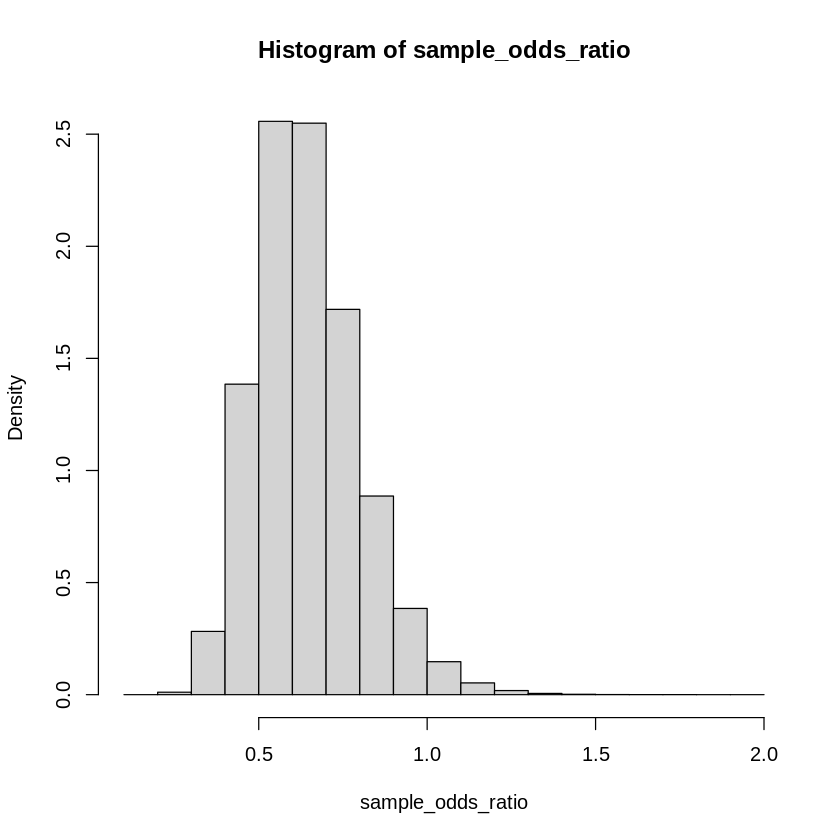

In [23]:
sample_odds_ratio <- odds_ratio( p1, p0 )

hist( sample_odds_ratio, freq = FALSE )

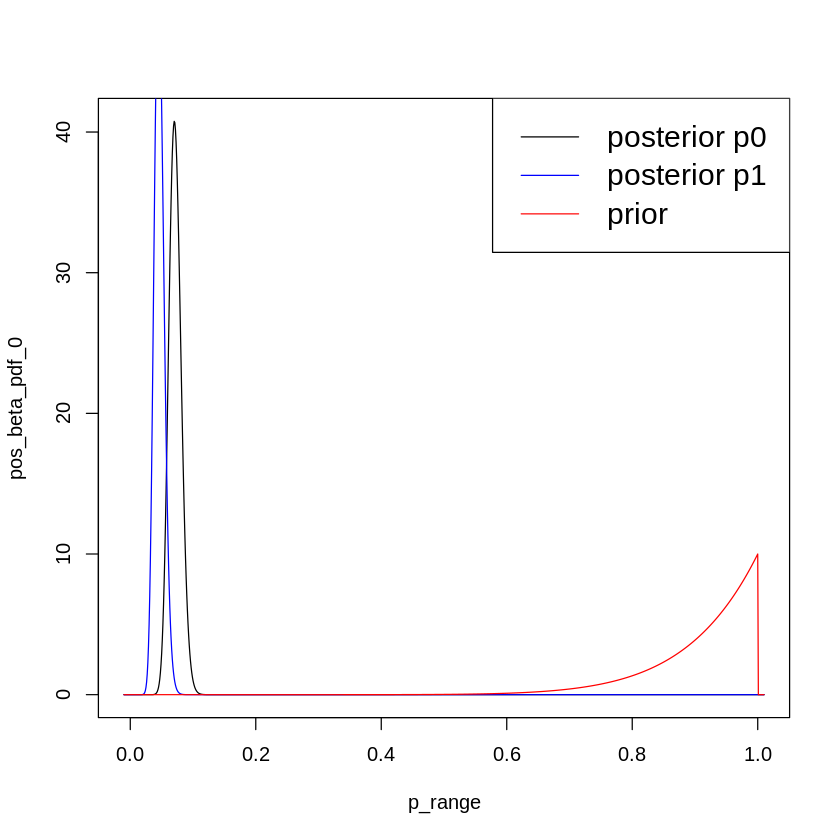

In [24]:
p_range    = seq( from = -0.01, to = 1.01, by = 0.001 ) # since beta is defined on 0-1

prior_beta_pdf_0 = dbeta( p_range , prior_alfa_0, prior_beta_0 )  
pos_beta_pdf_0   = dbeta( p_range , pos_alfa_0  , pos_beta_0 )  
pos_beta_pdf_1   = dbeta( p_range , pos_alfa_1  , pos_beta_1 )  


plot( p_range, pos_beta_pdf_0, type = 'l')
lines( p_range , pos_beta_pdf_1, type = 'l', col = 'blue')
lines( p_range , prior_beta_pdf_0, type = 'l', col = 'red')

# Add a legend
legend( x = 'topright', legend = c("posterior p0", "posterior p1", "prior"), col = c("black", "blue", "red"), lty = 1, cex = 1.5 )


The posterior looks very peaked and narrow. Provided we have a non-informative prior this somehow tells that the posterior quickly concentrates around the maximum likelihood value. This is because we have enough data for this particular problem. 

We can take a look at a totally misspecified prior ( $\alpha=10$ $\beta=1$). In this case we can see that the credible interval and the posterior mean is biased towards the prior, but we can still be certain that the $p_0$odd ratio is greater than $p_1$ odds ratio since values are below $1$. Obviously a misspecified prior will incorrectly bias posterior inferences. However for this particular problem the best choice is a non-informative prior because I don't have background knowledge about where the conditions of the patients groups to set this prior. For example nobody tells me that the control group do not have smookers/non-smookers etc.

# Exercise 3

In [25]:
data("windshieldy1")
data("windshieldy2")

In this case we have something similar to exercise 2 but in this case our data is continuous and thus we use a continuous likelihood, which in this case will be Gaussian. Since we assume independence:

$$
y_1,y_2 \sim p(y_1,y_2 \mid \mu_1, \mu_2, \sigma^2_1, \sigma^2_2 ) \propto
\sigma^{-1}_1 \sigma^{-1}_2 \exp\left(-\frac{1}{2\sigma^2_1}(y_1 - \mu_1)^2\right)\exp\left(-\frac{1}{2\sigma^2_2}(y_2 - \mu_2)^2\right) 
$$

Since the variance is unkown the prior distribution is chosen to be conjungate and thus is a normal-inverse $\chi^2$ distribution. We assume independence in the prior as well. Thus:


$$
\mu_1, \sigma_1^2, \mu_2, \sigma_2^2  \sim p(\mu_1,\sigma_1^2 \mid m_1, q^2_1 / k_1, v_1, q^2_1) p(\mu_2,\sigma_2^2 \mid m_2, q^2_2 / k_2, n_2, q^2_2) 
$$

we know make the prior non-informative (and improper) by taking the limits $k_i \rightarrow 0$ and $v_i \rightarrow -1$ and $q_i^2 \rightarrow 0$, yielding:

$$
\mu_1, \sigma_1^2, \mu_2, \sigma_2^2  \sim p(\mu_1,\sigma_1^2 \mid m_1, q^2_1 / k_1, v_1, q^2_1) p(\mu_2,\sigma_2^2 \mid m_2, q^2_2 / k_2, n_2, q^2_2)  \propto \sigma_1^2 \sigma_2^2 
$$

The posterior distribution given the data is however a proper normal inverse $\chi^2$ distribution given by:

$$
p(\mu_1,\sigma_1^2 \mid m_{n1}, q^2_{n_1} / k_{n_1}, v_{n_1}, q^2_{n_1}) p(\mu_2,\sigma_2^2 \mid m_{n_2}, q^2_{n_2} / k_{n_2}, v_{n_2}, q^2_{n_2}) \propto \\
\sigma_1^{-2-n_1}\exp\left(-\frac{1}{2\sigma_1^2}\left((n_1-1)s_1^2+ n_1(\mu_1 - \hat{y_1})^2\right)\right)
\sigma_2^{-2-n_2}\exp\left(-\frac{1}{2\sigma_2^2}\left((n_2-1)s_2^2+ n_2(\mu_2 - \hat{y_2})^2\right)\right)
$$


with:

$$
m_{n_i} = \hat{y_i}\\
%
%
k_{n_i} = n_i \\
%
%
v_{n_i} = n_i - 1 \\
%
%
q^2_{n_i} = s_i^2 
$$

$$
%
%
\hat{y_i} = \frac{1}{n_i} \sum_n y_{ni} \\
s^2_i       =  \frac{1}{n_i-1} \sum_n \left(y_{ni} - \hat{y_i} \right)^2
%
%
$$

The exercise again asks for inference about the mean $\mu_i$. Since the variance is unknown we must integrate it out from the posterior. For reasons already explained the marginal posterior $p(\mu_1,\mu_2\mid y_1,y_2)= p(\mu_1|y_1)p(\mu_2|y_2)$ is the product of two student-t distributions, with parameters mean $\hat{y_i}$, scale $\sqrt{s_i^2/n_i}$ and $n_i-1$ degrees of freedom (these are not derived directly since I will probably do exercise 3.9)

## a) 

In [26]:
posterior_marginal_mean_params <- function( data ){
    
    n     = length(data)
    y_hat = mean(data)
    s2    = 1 / ( n - 1 ) * sum( ( data - y_hat )**2 )   
    
    c( pos_mean = y_hat, pos_scale = sqrt( s2 / n ), pos_df = n - 1 ) 
    
}

In [27]:
## posterior mean diference
pos_params_1 = posterior_marginal_mean_params( data = windshieldy1 )
pos_params_2 = posterior_marginal_mean_params( data = windshieldy2 )

pos_mu_1     = pos_params_1['pos_mean']
pos_mu_2     = pos_params_2['pos_mean']

pos_mu_diff        = pos_mu_1 - pos_mu_2  

print(pos_mu_diff)

 pos_mean 
-1.209855 


In [28]:
## posterior mean diference credible intervals

pos_mu_1     = pos_params_1['pos_mean']
pos_mu_2     = pos_params_2['pos_mean']

pos_scale_1  = pos_params_1['pos_scale']
pos_scale_2  = pos_params_2['pos_scale']

pos_df_1     = pos_params_1['pos_df']
pos_df_2     = pos_params_2['pos_df']

# normalized t distribution
samples_1 = rt( n = 10000, df = pos_df_1 )
samples_2 = rt( n = 10000, df = pos_df_2 )
    
# un normalize
samples_1 = samples_1 * pos_scale_1 + pos_mu_1
samples_2 = samples_2 * pos_scale_2 + pos_mu_2    

# compute the diference
samples_diff = samples_1 - samples_2

inter = (1-0.95) / 2
q_95  = quantile( samples_diff, c(0+inter,1-inter) )
print(q_95)

       2.5%       97.5% 
-2.45601198  0.06107158 


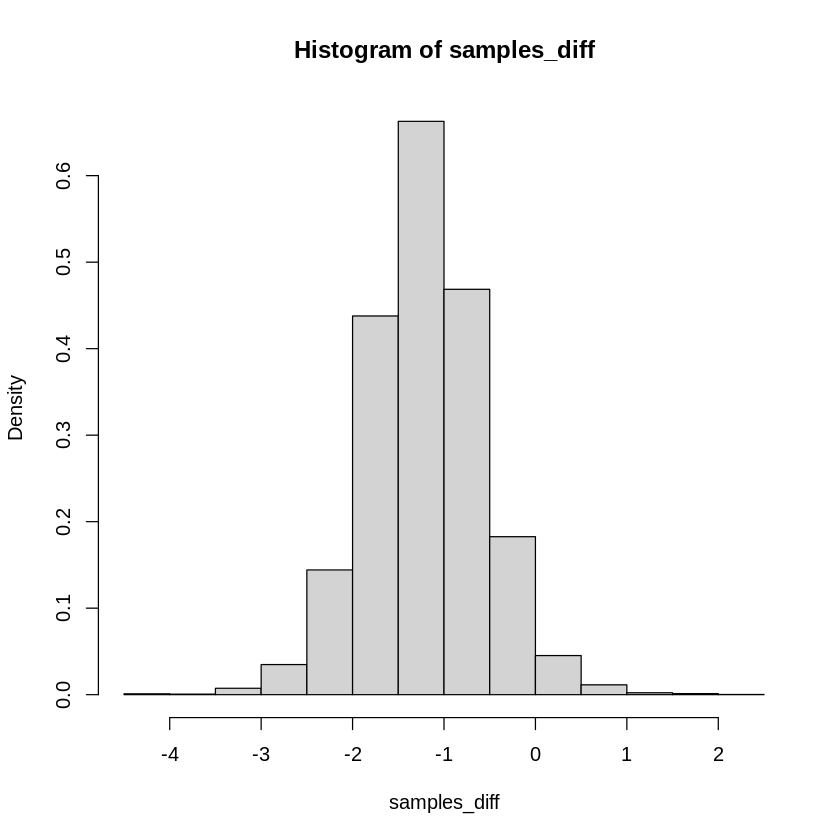

In [29]:
## Plot histogram
hist(samples_diff , freq = FALSE  )

In [30]:
## additionaly compute probability that w1 is better than w2.
tot_samples = length(samples_diff)

P_w1_hard_w2 = 1 - sum(samples_diff < 0) / tot_samples

print(P_w1_hard_w2)

[1] 0.0301


The mean difference between the hardness of windshields $1$ vs windshields $2$ is $-1.21$ with a $95%$ credible invertval lying in the range $[-2.47,  0.021]$. Thus, with high probability we can say that w2 is a harder than w1. 

Actually, the probability that w1 is harder than w2 is just $2.7$, which is very low. In other words $97.3%$ of time w2 will be harder than w1. 

## b)

Since it is a density the probability of being exactly equal is $0$. This is because a density assigns a $1.0$ probability between infinitely many possibilities ( the continuous range ). However for completeness we can infer a bit about the probability of the difference by taking a number $\epsilon$ and compute $P(\mu_d - \epsilon \leq\mu_d < \mu_d + \epsilon)$.

This can be done by first computing $P(X < \mu_d + \epsilon)$ and $P(X < \mu_d - \epsilon)$ with $\mu_d = 0$ and then taking the difference. The computation is performed numerically by taking the proportion of values below $\mu_d \pm \epsilon$.

In [31]:
eps = 0.01 # make this number arbitrary small and you will see the probability is zero

tot_samples = length(samples_diff)

P_x_leq_eps = sum(samples_diff < - eps) / tot_samples
P_x_ge_eps  = sum(samples_diff < eps) / tot_samples

target_prob = P_x_ge_eps - P_x_leq_eps

print(target_prob)

[1] 0.0017


## On Frank Harrell's recommendations

I don't find his notes very usefull because I don't understand where the numbers come from so I am going to try and replicate it here.

He says that the prior over the difference SBP between and B and A (B-A) is Gaussian with mean 0 and standard deviation such that this difference exceeds $10$ mmHg with probability 0.05.

A is the control treatment and B is the new treatment. The treatment effect is summarized as the difference in Systolic bloood pressure between the means of A and B.

Under these conditions the prior standard deviation is 5. This is because for a Gaussian de 95% mass is twice the standard deviation. Thus if 95% should not exceed $10$ mmHg then $5$ is the std.

In [32]:
prior_mu  = 0.0
prior_std = 5 

mmhg_range = seq( from = -20, to = 20, by = 0.01 )
norm_pdf   = dnorm( mmhg_range, mean = prior_mu, sd = prior_std )

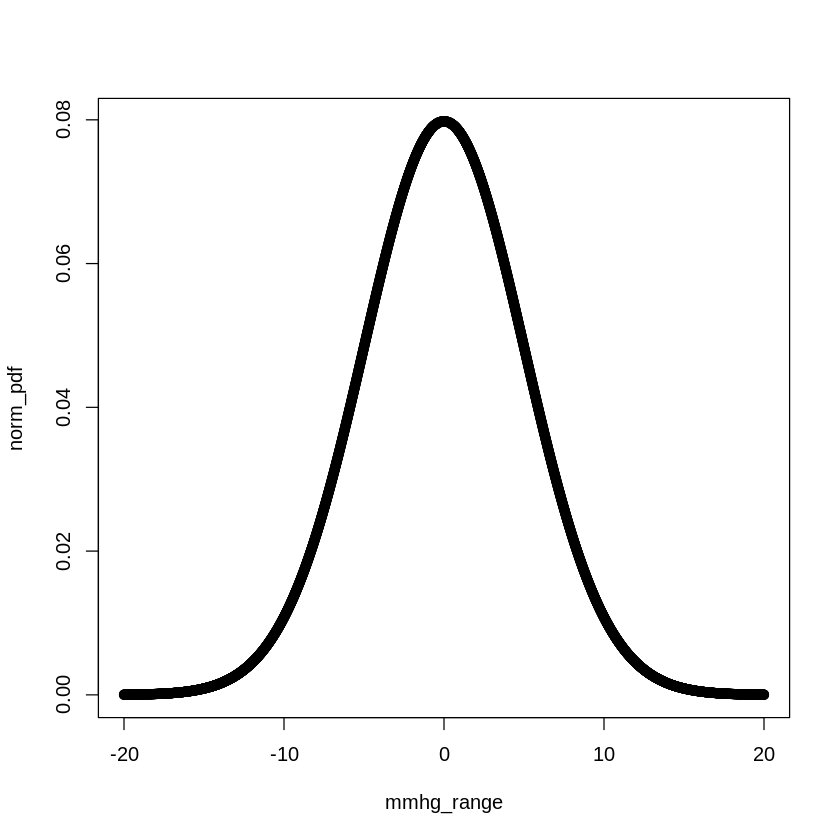

In [33]:
plot( mmhg_range, norm_pdf )

In [34]:
# check 95% credible interval so that I was on the right
samples = rnorm( 100000, mean = prior_mu, sd = prior_std )

inter = (1-0.95)/2

quantile( samples, c(0+inter,1-inter) ) # we see it is in +- 10 as expected.

2.5%     97.5% 
-9.746809  9.794018

I don't find where his first statement comes from. Basically he says that the probability that SBP with treatment B is lower than with treatment A is $0.67$. But I don't agree with this (at least with what I have understaood). If treatment B is lower than A then that means that $B-A < 0$ and since the prior is symetric and center at 0 then this probability will be exactly $0.5$ and not $0.67$.

So I guess he is reasoning about a posterior distribution we cannot compute because we don't have the data he has observed.

In [35]:
## let's compute the probability that the difference lies between 3 mmHg with same strategy as before

tot_samples = length(samples)

P_x_leq_m3 = sum(samples < -3) / tot_samples
P_x_leq_3  = sum(samples < 3) / tot_samples

target_prob = P_x_leq_3 - P_x_leq_m3

print(target_prob)

[1] 0.45185
